$u_x = u (1-u)$

In [2]:
#Imports
import numpy as np 
from numpy import pi
import matplotlib.pyplot as plt
import sciann as sn 
from sciann_datagenerator import * 

---------------------- SCIANN 0.6.7.3 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.9.2 
Python Version: 3.8.13 | packaged by conda-forge | (default, Mar 25 2022, 06:04:14) 
[Clang 12.0.1 ] 

Outdated SciANN installation is found (V-0.6.7.3). Get the latest version (V-0.6.7.5):  
      > pip [--user] install --upgrade sciann  


We are going to solve the logistic equation.If $f$ is the solution of the logistic equation with initial value $x_0$, our function will take two inputs, x_0 and x, and give the value of $f$.

In [59]:
#We are solving the logistic equation in a positive interval of R, [0,4].
#The initial value can be anywhere in [0,2]


#armo un intervalo en R, [0,4]. Le voy a poner boundary condition en el borde izquierdo que va a ser el dato inicial

#The following command generates datapoints for the domain and the boundary condition.

dg = DataGeneratorXY([0., 4.],[0., 2.], ["domain",'bc-left'], 2000) #, "bc-right"]
input_data, target_data = dg.get_data()

#input_data : los valores de x donde voy a evaluar la u
#target_data: Los valores de u(x) para cada x en input_data. Como recien lo inicializo, es vector de ceros.
#Se rellena cuando entrenemos la red.



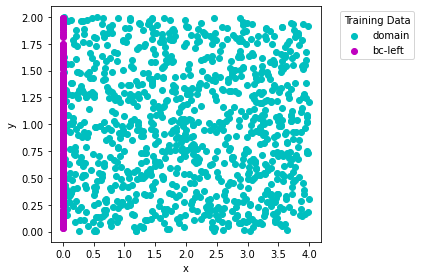

In [60]:
dg.plot_data()
#ploteo mis puntos _collocation points_ que tienen muchos puntos en el borde, al pedo, y  puntos en el intervalo [0,4]
#El scatter es solo para que se vea mejor, son todos puntos de R.

In [69]:
#defino mis funcion y mis variables

#function variable
x = sn.Variable('x')

#initial condition. I treat it as a variable for the NN u.
x0 = sn.Variable('x0')

u = sn.Functional('u', [x,x0], hidden_layers = 4*[15], activation = 'tanh', res_net=True) #esta es la red neuronal cruda sin entrenar,


In [70]:
#ahora defino la loss function para u

#Pido que satisfaga la ecuacion
L = sn.diff(u, x, order=1) + u * (sn.sub(u,1)) # sacando -1 de factor comun: Ux - u(1-u) = Ux + u (u-1)

#Dato inicial u(0) = x0
IC = (x==0.) * (sn.abs( sn.sub(u,x0)))

In [71]:
modelo = sn.SciModel([x,x0], [L,IC], optimizer = 'adam')


In [72]:
history = modelo.train(x_true = input_data, 
             y_true = target_data, 
             epochs = 100,
             learning_rate = 0.001,
             adaptive_weights={'method': 'NTK', 'freq':10, 'use_score':True})


Total samples: 2500 
Batch size: 64 
Total batches: 40 


+ NTK evaluation time [s]: 1.2115552425384521 

+ adaptive_weights at epoch 1: [0.11190835399544106, 1.888091646004559]
Epoch 1/100
40/40 [==============================] - 3s 26ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0858 - add_4_loss: 0.5271 - mul_72_loss: 0.0142 - lr: 0.0010 - time: 4.2232 - loss_weight_0: 0.1119 - loss_weight_1: 1.8881 - loss_gradient_0: 3117.5609 - loss_gradient_1: 38.3687
Epoch 2/100
40/40 [==============================] - 1s 14ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0312 - add_4_loss: 0.1996 - mul_72_loss: 0.0047 - lr: 0.0010 - time: 0.5999 - loss_weight_0: 0.1119 - loss_weight_1: 1.8881 - loss_gradient_0: 3117.5609 - loss_gradient_1: 38.3687
Epoch 3/100
40/40 [==============================] - 1s 15ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0199 - add_4_loss: 0.1334 - mul_72_loss: 0.0026 - lr: 0.0010 - time: 0.6677 - loss_weight_0: 0.1119 - loss_weight_1: 1.8881 - loss_gra

In [73]:
#valores = np.arange(0,4,0.001)

valores = np.meshgrid(np.linspace(0,4,100),np.linspace(0,2,10))
valores_y = u.eval(valores)

In [74]:

valores[0]

array([[0.        , 0.04040404, 0.08080808, 0.12121212, 0.16161616,
        0.2020202 , 0.24242424, 0.28282828, 0.32323232, 0.36363636,
        0.4040404 , 0.44444444, 0.48484848, 0.52525253, 0.56565657,
        0.60606061, 0.64646465, 0.68686869, 0.72727273, 0.76767677,
        0.80808081, 0.84848485, 0.88888889, 0.92929293, 0.96969697,
        1.01010101, 1.05050505, 1.09090909, 1.13131313, 1.17171717,
        1.21212121, 1.25252525, 1.29292929, 1.33333333, 1.37373737,
        1.41414141, 1.45454545, 1.49494949, 1.53535354, 1.57575758,
        1.61616162, 1.65656566, 1.6969697 , 1.73737374, 1.77777778,
        1.81818182, 1.85858586, 1.8989899 , 1.93939394, 1.97979798,
        2.02020202, 2.06060606, 2.1010101 , 2.14141414, 2.18181818,
        2.22222222, 2.26262626, 2.3030303 , 2.34343434, 2.38383838,
        2.42424242, 2.46464646, 2.50505051, 2.54545455, 2.58585859,
        2.62626263, 2.66666667, 2.70707071, 2.74747475, 2.78787879,
        2.82828283, 2.86868687, 2.90909091, 2.94

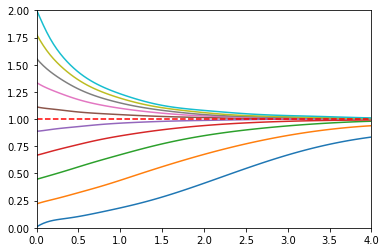

In [75]:
#de valores y tengo que recuperar mis curvas

for i in range(len(valores[1])):
    plt.plot(valores[0][0],valores_y[i])
plt.xlim([0,4])
plt.ylim([0,2])
plt.plot([0,4],[1,1],'--r')

$u_t = Lap (u) + u(1-u/k)$

u(x,t) = proporcion de gente en x a tiempo t